<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import sys
import os

try:
    os.chdir(r"/home/hanaz63/PAPER_MOLECULAR_ROTATIONS_2022/nobackup/molgri")
    sys.path.append(r"/home/hanaz63/PAPER_MOLECULAR_ROTATIONS_2022/nobackup")
except FileNotFoundError:
    os.chdir(r"D:\HANA\phD\PAPER_2022\molecularRotationalGrids")
    sys.path.append(r"D:\HANA\phD\PAPER_2022\molecularRotationalGrids")
    
import warnings
warnings.filterwarnings("ignore")

In [18]:
import numpy as np
from deeptime.markov import TransitionCountEstimator
from deeptime.markov.msm import MaximumLikelihoodMSM
from molgri.plotting.widgets import ViewManager
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
from molgri.molecules.transitions import SimulationHistogram, MSM
from molgri.space.fullgrid import FullGrid


The process for creating a MSM from deeptime and molgri assignment process:
1) assign the trajectory to discrete states using SimulationHistogram and get_full_assignments()

2) build a count estimator between these states with TransitionCountEstimator

3) get a TransitionCountModel with NXN states by fitting assignments to an estimator

4) now build a MaximumLikelihoodMSM estimator

5) fit a TransitionCountModel to it to obtain MarkovStateModel - from here, we can get eigenvalues, eigenvectors etc

The whole process can be repeated for different values of the lagtime tau.

In [3]:
# 1) assign the trajectory to discrete states using SimulationHistogram and get_full_assignments()
water_sh = SimulationHistogram("H2O_H2O_0095_800008", "H2O", is_pt=False,
                                   full_grid=FullGrid(b_grid_name="20", o_grid_name="20",
                                                      t_grid_name="linspace(0.2, 1.2, 10)"),
                                   second_molecule_selection="bynum 4:6", use_saved=False)
assignments = water_sh.get_full_assignments()

In [4]:
def get_markov_model_for_taus(tau_array, assignments, len_fullgrid):
    all_msms = []
    for tau in tau_array:
        # 2) build a  count estimator with TransitionCountEstimator
        count_estimator = TransitionCountEstimator(lagtime=tau, count_mode="sliding",
                                                   sparse=True) #n_states=len_fullgrid, 

        # 3) get a TransitionCountModel with NXN states by fitting assignments to an estimator
        count_model = count_estimator.fit(assignments).fetch_model()


        # 4) now build a MaximumLikelihoodMSM estimator
        estimator = MaximumLikelihoodMSM(reversible=True,
                                                 sparse=True,
                                                )

        # 5) fit a TransitionCountModel to it to obtain MarkovStateModel
        markov_model = estimator.fit_from_counts(count_model).fetch_model()
        
        all_msms.append(markov_model)
    return all_msms

In [5]:
taus = np.array([1, 2, 3, 5, 7, 10, 15, 20, 30, 40, 50, 70, 80, 90, 100, 110, 130, 150, 180, 200, 220,
                          250, 270, 300, 400, 600, 700, 850, 1000])
# explain the n states edgecase?????
msms = get_markov_model_for_taus(tau_array=taus, assignments=assignments, len_fullgrid=len(water_sh.full_grid))

Skipping state set [1] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [4] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [7] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [8] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [10] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [11] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [13] due to error in estimation: Some row and corresponding column of the count matrix C have zer

Skipping state set [137] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [139] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [140] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [142] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [143] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [145] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [146] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [150] due to error in estimation: Some row and corresponding column of the count matr

Skipping state set [233] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [234] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [235] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [236] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [237] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [238] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [239] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [240] due to error in estimation: Some row and corresponding column of the count matr

Skipping state set [324] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [325] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [326] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [327] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [328] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [329] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [330] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [332] due to error in estimation: Some row and corresponding column of the count matr

Skipping state set [689] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [692] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [704] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [720] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [725] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [729] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [732] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [742] due to error in estimation: Some row and corresponding column of the count matr

Skipping state set [1959] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1974] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2154] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2206] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2800] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2802] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2803] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2804] due to error in estimation: Some row and corresponding column of the co

Skipping state set [2922] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2923] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2924] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2925] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2931] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2932] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2934] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2935] due to error in estimation: Some row and corresponding column of the co

Skipping state set [3037] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3038] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3040] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3041] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3042] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3043] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3045] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3047] due to error in estimation: Some row and corresponding column of the co

Skipping state set [3133] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3134] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3136] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3138] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3140] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3142] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3145] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3146] due to error in estimation: Some row and corresponding column of the co

Skipping state set [74] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [79] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [80] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [83] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [84] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [85] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [86] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [89] due to error in estimation: Some row and corresponding column of the count matrix C hav

Skipping state set [193] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [194] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [195] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [196] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [197] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [198] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [200] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [201] due to error in estimation: Some row and corresponding column of the count matr

Skipping state set [281] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [282] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [283] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [285] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [288] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [289] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [291] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [292] due to error in estimation: Some row and corresponding column of the count matr

Skipping state set [374] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [375] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [377] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [378] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [380] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [385] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [386] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [387] due to error in estimation: Some row and corresponding column of the count matr

Skipping state set [1129] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1140] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1145] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1155] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1156] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1165] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1173] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1175] due to error in estimation: Some row and corresponding column of the co

Skipping state set [2866] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2869] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2870] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2871] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2872] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2874] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2875] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2876] due to error in estimation: Some row and corresponding column of the co

Skipping state set [2981] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2982] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2983] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2984] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2985] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2986] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2991] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2992] due to error in estimation: Some row and corresponding column of the co

Skipping state set [3087] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3091] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3092] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3094] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3095] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3096] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3097] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3099] due to error in estimation: Some row and corresponding column of the co

Skipping state set [1] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [4] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [7] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [8] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [10] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [11] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [13] due to error in estimation: Some row and corresponding column of the count matrix C have zer

Skipping state set [137] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [139] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [140] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [142] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [143] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [145] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [146] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [150] due to error in estimation: Some row and corresponding column of the count matr

Skipping state set [233] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [234] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [235] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [236] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [237] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [238] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [239] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [240] due to error in estimation: Some row and corresponding column of the count matr

Skipping state set [324] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [325] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [326] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [327] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [328] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [329] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [330] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [332] due to error in estimation: Some row and corresponding column of the count matr

Skipping state set [689] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [692] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [704] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [720] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [725] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [729] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [732] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [742] due to error in estimation: Some row and corresponding column of the count matr

Skipping state set [1959] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1974] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2154] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2206] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2800] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2802] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2803] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2804] due to error in estimation: Some row and corresponding column of the co

Skipping state set [2922] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2923] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2924] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2925] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2931] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2932] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2934] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2935] due to error in estimation: Some row and corresponding column of the co

Skipping state set [3037] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3038] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3040] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3041] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3042] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3043] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3045] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3047] due to error in estimation: Some row and corresponding column of the co

Skipping state set [3133] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3134] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3136] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3138] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3140] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3142] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3145] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3146] due to error in estimation: Some row and corresponding column of the co

Skipping state set [74] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [79] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [80] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [83] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [84] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [85] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [86] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [89] due to error in estimation: Some row and corresponding column of the count matrix C hav

Skipping state set [193] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [194] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [195] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [196] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [197] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [198] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [200] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [201] due to error in estimation: Some row and corresponding column of the count matr

Skipping state set [281] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [282] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [283] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [285] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [288] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [289] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [291] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [292] due to error in estimation: Some row and corresponding column of the count matr

Skipping state set [374] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [375] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [377] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [378] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [380] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [385] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [386] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [387] due to error in estimation: Some row and corresponding column of the count matr

Skipping state set [1129] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1140] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1145] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1155] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1156] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1165] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1173] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1175] due to error in estimation: Some row and corresponding column of the co

Skipping state set [2866] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2869] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2870] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2871] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2872] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2874] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2875] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2876] due to error in estimation: Some row and corresponding column of the co

Skipping state set [2981] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2982] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2983] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2984] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2985] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2986] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2991] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2992] due to error in estimation: Some row and corresponding column of the co

Skipping state set [3087] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3091] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3092] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3094] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3095] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3096] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3097] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3099] due to error in estimation: Some row and corresponding column of the co

Skipping state set [1] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [4] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [7] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [8] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [10] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [11] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [13] due to error in estimation: Some row and corresponding column of the count matrix C have zer

Skipping state set [137] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [139] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [140] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [142] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [143] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [145] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [146] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [150] due to error in estimation: Some row and corresponding column of the count matr

Skipping state set [233] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [234] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [235] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [236] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [237] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [238] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [239] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [240] due to error in estimation: Some row and corresponding column of the count matr

Skipping state set [324] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [325] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [326] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [327] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [328] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [329] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [330] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [332] due to error in estimation: Some row and corresponding column of the count matr

Skipping state set [689] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [692] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [704] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [720] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [725] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [729] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [732] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [742] due to error in estimation: Some row and corresponding column of the count matr

Skipping state set [1959] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1974] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2154] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2206] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2800] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2802] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2803] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2804] due to error in estimation: Some row and corresponding column of the co

Skipping state set [2922] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2923] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2924] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2925] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2931] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2932] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2934] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2935] due to error in estimation: Some row and corresponding column of the co

Skipping state set [3037] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3038] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3040] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3041] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3042] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3043] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3045] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3047] due to error in estimation: Some row and corresponding column of the co

Skipping state set [3133] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3134] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3136] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3138] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3140] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3142] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3145] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3146] due to error in estimation: Some row and corresponding column of the co

Skipping state set [74] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [79] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [80] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [83] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [84] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [85] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [86] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [89] due to error in estimation: Some row and corresponding column of the count matrix C hav

Skipping state set [193] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [194] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [195] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [196] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [197] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [198] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [200] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [201] due to error in estimation: Some row and corresponding column of the count matr

Skipping state set [281] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [282] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [283] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [285] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [288] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [289] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [291] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [292] due to error in estimation: Some row and corresponding column of the count matr

Skipping state set [374] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [375] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [377] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [378] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [380] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [385] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [386] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [387] due to error in estimation: Some row and corresponding column of the count matr

Skipping state set [1129] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1140] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1145] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1155] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1156] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1165] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1173] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1175] due to error in estimation: Some row and corresponding column of the co

Skipping state set [2866] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2869] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2870] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2871] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2872] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2874] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2875] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2876] due to error in estimation: Some row and corresponding column of the co

Skipping state set [2981] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2982] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2983] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2984] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2985] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2986] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2991] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2992] due to error in estimation: Some row and corresponding column of the co

Skipping state set [3087] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3091] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3092] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3094] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3095] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3096] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3097] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3099] due to error in estimation: Some row and corresponding column of the co

Skipping state set [1] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [4] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [7] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [8] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [10] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [11] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [13] due to error in estimation: Some row and corresponding column of the count matrix C have zer

Skipping state set [137] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [139] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [140] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [142] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [143] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [145] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [146] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [150] due to error in estimation: Some row and corresponding column of the count matr

Skipping state set [233] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [234] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [235] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [236] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [237] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [238] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [239] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [240] due to error in estimation: Some row and corresponding column of the count matr

Skipping state set [324] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [325] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [326] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [327] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [328] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [329] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [330] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [332] due to error in estimation: Some row and corresponding column of the count matr

Skipping state set [689] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [692] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [704] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [720] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [725] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [729] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [732] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [742] due to error in estimation: Some row and corresponding column of the count matr

Skipping state set [1959] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1974] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2154] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2206] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2800] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2802] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2803] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2804] due to error in estimation: Some row and corresponding column of the co

Skipping state set [2922] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2923] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2924] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2925] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2931] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2932] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2934] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2935] due to error in estimation: Some row and corresponding column of the co

Skipping state set [3037] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3038] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3040] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3041] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3042] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3043] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3045] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3047] due to error in estimation: Some row and corresponding column of the co

Skipping state set [3133] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3134] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3136] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3138] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3140] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3142] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3145] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3146] due to error in estimation: Some row and corresponding column of the co

Skipping state set [74] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [79] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [80] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [83] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [84] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [85] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [86] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [89] due to error in estimation: Some row and corresponding column of the count matrix C hav

Skipping state set [193] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [194] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [195] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [196] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [197] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [198] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [200] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [201] due to error in estimation: Some row and corresponding column of the count matr

Skipping state set [281] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [282] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [283] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [285] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [288] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [289] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [291] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [292] due to error in estimation: Some row and corresponding column of the count matr

Skipping state set [374] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [375] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [377] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [378] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [380] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [385] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [386] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [387] due to error in estimation: Some row and corresponding column of the count matr

Skipping state set [1129] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1140] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1145] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1155] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1156] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1165] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1173] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1175] due to error in estimation: Some row and corresponding column of the co

Skipping state set [2866] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2869] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2870] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2871] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2872] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2874] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2875] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2876] due to error in estimation: Some row and corresponding column of the co

Skipping state set [2981] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2982] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2983] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2984] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2985] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2986] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2991] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2992] due to error in estimation: Some row and corresponding column of the co

Skipping state set [3087] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3091] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3092] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3094] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3095] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3096] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3097] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3099] due to error in estimation: Some row and corresponding column of the co

Skipping state set [1] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [4] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [7] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [8] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [10] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [11] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [13] due to error in estimation: Some row and corresponding column of the count matrix C have zer

Skipping state set [137] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [139] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [140] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [142] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [143] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [145] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [146] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [150] due to error in estimation: Some row and corresponding column of the count matr

Skipping state set [233] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [234] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [235] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [236] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [237] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [238] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [239] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [240] due to error in estimation: Some row and corresponding column of the count matr

Skipping state set [324] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [325] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [326] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [327] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [328] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [329] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [330] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [332] due to error in estimation: Some row and corresponding column of the count matr

Skipping state set [689] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [692] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [704] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [720] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [725] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [729] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [732] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [742] due to error in estimation: Some row and corresponding column of the count matr

Skipping state set [1959] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1974] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2154] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2206] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2800] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2802] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2803] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2804] due to error in estimation: Some row and corresponding column of the co

Skipping state set [2922] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2923] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2924] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2925] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2931] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2932] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2934] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2935] due to error in estimation: Some row and corresponding column of the co

Skipping state set [3037] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3038] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3040] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3041] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3042] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3043] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3045] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3047] due to error in estimation: Some row and corresponding column of the co

Skipping state set [3133] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3134] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3136] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3138] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3140] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3142] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3145] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3146] due to error in estimation: Some row and corresponding column of the co

Skipping state set [74] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [79] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [80] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [83] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [84] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [85] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [86] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [89] due to error in estimation: Some row and corresponding column of the count matrix C hav

Skipping state set [193] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [194] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [195] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [196] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [197] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [198] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [200] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [201] due to error in estimation: Some row and corresponding column of the count matr

Skipping state set [281] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [282] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [283] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [285] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [288] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [289] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [291] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [292] due to error in estimation: Some row and corresponding column of the count matr

Skipping state set [374] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [375] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [377] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [378] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [380] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [385] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [386] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [387] due to error in estimation: Some row and corresponding column of the count matr

Skipping state set [1129] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1140] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1145] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1155] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1156] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1165] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1173] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1175] due to error in estimation: Some row and corresponding column of the co

Skipping state set [2866] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2869] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2870] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2871] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2872] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2874] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2875] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2876] due to error in estimation: Some row and corresponding column of the co

Skipping state set [2981] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2982] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2983] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2984] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2985] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2986] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2991] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2992] due to error in estimation: Some row and corresponding column of the co

Skipping state set [3087] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3091] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3092] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3094] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3095] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3096] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3097] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3099] due to error in estimation: Some row and corresponding column of the co

Skipping state set [1] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [4] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [7] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [8] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [10] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [11] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [13] due to error in estimation: Some row and corresponding column of the count matrix C have zer

Skipping state set [137] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [139] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [140] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [142] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [143] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [145] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [146] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [150] due to error in estimation: Some row and corresponding column of the count matr

Skipping state set [233] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [234] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [235] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [236] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [237] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [238] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [239] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [240] due to error in estimation: Some row and corresponding column of the count matr

Skipping state set [324] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [325] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [326] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [327] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [328] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [329] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [330] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [332] due to error in estimation: Some row and corresponding column of the count matr

Skipping state set [689] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [692] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [704] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [720] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [725] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [729] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [732] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [742] due to error in estimation: Some row and corresponding column of the count matr

Skipping state set [1959] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1974] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2154] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2206] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2800] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2802] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2803] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2804] due to error in estimation: Some row and corresponding column of the co

Skipping state set [2922] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2923] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2924] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2925] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2931] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2932] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2934] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2935] due to error in estimation: Some row and corresponding column of the co

Skipping state set [3037] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3038] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3040] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3041] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3042] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3043] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3045] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3047] due to error in estimation: Some row and corresponding column of the co

Skipping state set [3133] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3134] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3136] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3138] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3140] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3142] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3145] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3146] due to error in estimation: Some row and corresponding column of the co

Skipping state set [74] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [79] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [80] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [83] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [84] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [85] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [86] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [89] due to error in estimation: Some row and corresponding column of the count matrix C hav

Skipping state set [193] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [194] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [195] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [196] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [197] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [198] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [200] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [201] due to error in estimation: Some row and corresponding column of the count matr

Skipping state set [281] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [282] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [283] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [285] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [288] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [289] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [291] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [292] due to error in estimation: Some row and corresponding column of the count matr

Skipping state set [374] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [375] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [377] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [378] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [380] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [385] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [386] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [387] due to error in estimation: Some row and corresponding column of the count matr

Skipping state set [1129] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1140] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1145] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1155] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1156] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1165] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1173] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1175] due to error in estimation: Some row and corresponding column of the co

Skipping state set [2866] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2869] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2870] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2871] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2872] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2874] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2875] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2876] due to error in estimation: Some row and corresponding column of the co

Skipping state set [2981] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2982] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2983] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2984] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2985] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2986] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2991] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2992] due to error in estimation: Some row and corresponding column of the co

Skipping state set [3087] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3091] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3092] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3094] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3095] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3096] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3097] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3099] due to error in estimation: Some row and corresponding column of the co

Skipping state set [1] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [4] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [7] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [8] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [10] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [11] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [13] due to error in estimation: Some row and corresponding column of the count matrix C have zer

Skipping state set [137] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [139] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [140] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [142] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [143] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [145] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [146] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [150] due to error in estimation: Some row and corresponding column of the count matr

Skipping state set [233] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [234] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [235] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [236] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [237] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [238] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [239] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [240] due to error in estimation: Some row and corresponding column of the count matr

Skipping state set [324] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [325] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [326] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [327] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [328] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [329] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [330] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [332] due to error in estimation: Some row and corresponding column of the count matr

Skipping state set [689] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [692] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [704] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [720] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [725] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [729] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [732] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [742] due to error in estimation: Some row and corresponding column of the count matr

Skipping state set [1959] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1974] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2154] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2206] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2800] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2802] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2803] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2804] due to error in estimation: Some row and corresponding column of the co

Skipping state set [2922] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2923] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2924] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2925] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2931] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2932] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2934] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2935] due to error in estimation: Some row and corresponding column of the co

Skipping state set [3037] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3038] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3040] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3041] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3042] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3043] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3045] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3047] due to error in estimation: Some row and corresponding column of the co

Skipping state set [3133] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3134] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3136] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3138] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3140] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3142] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3145] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3146] due to error in estimation: Some row and corresponding column of the co

Skipping state set [74] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [79] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [80] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [83] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [84] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [85] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [86] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [89] due to error in estimation: Some row and corresponding column of the count matrix C hav

Skipping state set [193] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [194] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [195] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [196] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [197] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [198] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [200] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [201] due to error in estimation: Some row and corresponding column of the count matr

Skipping state set [281] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [282] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [283] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [285] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [288] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [289] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [291] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [292] due to error in estimation: Some row and corresponding column of the count matr

Skipping state set [374] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [375] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [377] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [378] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [380] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [385] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [386] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [387] due to error in estimation: Some row and corresponding column of the count matr

Skipping state set [1129] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1140] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1145] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1155] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1156] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1165] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1173] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1175] due to error in estimation: Some row and corresponding column of the co

Skipping state set [2866] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2869] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2870] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2871] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2872] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2874] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2875] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2876] due to error in estimation: Some row and corresponding column of the co

Skipping state set [2981] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2982] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2983] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2984] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2985] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2986] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2991] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2992] due to error in estimation: Some row and corresponding column of the co

Skipping state set [3087] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3091] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3092] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3094] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3095] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3096] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3097] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3099] due to error in estimation: Some row and corresponding column of the co

Skipping state set [1] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [4] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [7] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [8] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [10] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [11] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [13] due to error in estimation: Some row and corresponding column of the count matrix C have zer

Skipping state set [137] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [139] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [140] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [142] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [143] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [145] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [146] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [150] due to error in estimation: Some row and corresponding column of the count matr

Skipping state set [233] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [234] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [235] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [236] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [237] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [238] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [239] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [240] due to error in estimation: Some row and corresponding column of the count matr

Skipping state set [324] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [325] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [326] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [327] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [328] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [329] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [330] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [332] due to error in estimation: Some row and corresponding column of the count matr

Skipping state set [689] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [692] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [704] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [720] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [725] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [729] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [732] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [742] due to error in estimation: Some row and corresponding column of the count matr

Skipping state set [1959] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1974] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2154] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2206] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2800] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2802] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2803] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2804] due to error in estimation: Some row and corresponding column of the co

Skipping state set [2922] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2923] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2924] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2925] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2931] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2932] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2934] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2935] due to error in estimation: Some row and corresponding column of the co

Skipping state set [3037] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3038] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3040] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3041] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3042] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3043] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3045] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3047] due to error in estimation: Some row and corresponding column of the co

Skipping state set [3133] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3134] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3136] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3138] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3140] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3142] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3145] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3146] due to error in estimation: Some row and corresponding column of the co

Skipping state set [74] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [79] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [80] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [83] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [84] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [85] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [86] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [89] due to error in estimation: Some row and corresponding column of the count matrix C hav

Skipping state set [193] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [194] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [195] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [196] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [197] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [198] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [200] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [201] due to error in estimation: Some row and corresponding column of the count matr

Skipping state set [281] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [282] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [283] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [285] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [288] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [289] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [291] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [292] due to error in estimation: Some row and corresponding column of the count matr

Skipping state set [374] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [375] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [377] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [378] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [380] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [385] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [386] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [387] due to error in estimation: Some row and corresponding column of the count matr

Skipping state set [1129] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1140] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1145] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1155] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1156] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1165] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1173] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1175] due to error in estimation: Some row and corresponding column of the co

Skipping state set [2866] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2869] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2870] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2871] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2872] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2874] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2875] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2876] due to error in estimation: Some row and corresponding column of the co

Skipping state set [2981] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2982] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2983] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2984] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2985] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2986] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2991] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2992] due to error in estimation: Some row and corresponding column of the co

Skipping state set [3087] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3091] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3092] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3094] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3095] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3096] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3097] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3099] due to error in estimation: Some row and corresponding column of the co

Skipping state set [1] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [4] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [7] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [8] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [10] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [11] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [13] due to error in estimation: Some row and corresponding column of the count matrix C have zer

Skipping state set [137] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [139] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [140] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [142] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [143] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [145] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [146] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [150] due to error in estimation: Some row and corresponding column of the count matr

Skipping state set [233] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [234] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [235] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [236] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [237] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [238] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [239] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [240] due to error in estimation: Some row and corresponding column of the count matr

Skipping state set [324] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [325] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [326] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [327] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [328] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [329] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [330] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [332] due to error in estimation: Some row and corresponding column of the count matr

Skipping state set [689] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [692] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [704] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [720] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [725] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [729] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [732] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [742] due to error in estimation: Some row and corresponding column of the count matr

Skipping state set [1959] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1974] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2154] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2206] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2800] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2802] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2803] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2804] due to error in estimation: Some row and corresponding column of the co

Skipping state set [2922] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2923] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2924] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2925] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2931] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2932] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2934] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2935] due to error in estimation: Some row and corresponding column of the co

Skipping state set [3037] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3038] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3040] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3041] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3042] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3043] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3045] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3047] due to error in estimation: Some row and corresponding column of the co

Skipping state set [3133] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3134] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3136] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3138] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3140] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3142] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3145] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3146] due to error in estimation: Some row and corresponding column of the co

Skipping state set [74] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [79] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [80] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [83] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [84] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [85] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [86] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [89] due to error in estimation: Some row and corresponding column of the count matrix C hav

Skipping state set [193] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [194] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [195] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [196] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [197] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [198] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [200] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [201] due to error in estimation: Some row and corresponding column of the count matr

Skipping state set [281] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [282] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [283] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [285] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [288] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [289] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [291] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [292] due to error in estimation: Some row and corresponding column of the count matr

Skipping state set [374] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [375] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [377] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [378] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [380] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [385] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [386] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [387] due to error in estimation: Some row and corresponding column of the count matr

Skipping state set [1129] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1140] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1145] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1155] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1156] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1165] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1173] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1175] due to error in estimation: Some row and corresponding column of the co

Skipping state set [2866] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2869] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2870] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2871] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2872] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2874] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2875] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2876] due to error in estimation: Some row and corresponding column of the co

Skipping state set [2981] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2982] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2983] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2984] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2985] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2986] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2991] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2992] due to error in estimation: Some row and corresponding column of the co

Skipping state set [3087] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3091] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3092] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3094] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3095] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3096] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3097] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3099] due to error in estimation: Some row and corresponding column of the co

Skipping state set [1] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [4] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [7] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [8] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [10] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [11] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [13] due to error in estimation: Some row and corresponding column of the count matrix C have zer

Skipping state set [137] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [139] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [140] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [142] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [143] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [145] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [146] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [150] due to error in estimation: Some row and corresponding column of the count matr

Skipping state set [233] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [234] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [235] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [236] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [237] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [238] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [239] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [240] due to error in estimation: Some row and corresponding column of the count matr

Skipping state set [324] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [325] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [326] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [327] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [328] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [329] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [330] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [332] due to error in estimation: Some row and corresponding column of the count matr

Skipping state set [689] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [692] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [704] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [720] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [725] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [729] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [732] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [742] due to error in estimation: Some row and corresponding column of the count matr

Skipping state set [1959] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1974] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2154] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2206] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2800] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2802] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2803] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2804] due to error in estimation: Some row and corresponding column of the co

Skipping state set [2922] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2923] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2924] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2925] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2931] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2932] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2934] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2935] due to error in estimation: Some row and corresponding column of the co

Skipping state set [3037] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3038] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3040] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3041] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3042] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3043] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3045] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3047] due to error in estimation: Some row and corresponding column of the co

Skipping state set [3133] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3134] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3136] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3138] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3140] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3142] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3145] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3146] due to error in estimation: Some row and corresponding column of the co

Skipping state set [74] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [79] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [80] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [83] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [84] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [85] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [86] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [89] due to error in estimation: Some row and corresponding column of the count matrix C hav

Skipping state set [193] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [194] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [195] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [196] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [197] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [198] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [200] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [201] due to error in estimation: Some row and corresponding column of the count matr

Skipping state set [281] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [282] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [283] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [285] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [288] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [289] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [291] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [292] due to error in estimation: Some row and corresponding column of the count matr

Skipping state set [374] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [375] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [377] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [378] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [380] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [385] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [386] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [387] due to error in estimation: Some row and corresponding column of the count matr

Skipping state set [1129] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1140] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1145] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1155] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1156] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1165] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1173] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1175] due to error in estimation: Some row and corresponding column of the co

Skipping state set [2866] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2869] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2870] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2871] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2872] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2874] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2875] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2876] due to error in estimation: Some row and corresponding column of the co

Skipping state set [2981] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2982] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2983] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2984] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2985] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2986] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2991] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2992] due to error in estimation: Some row and corresponding column of the co

Skipping state set [3087] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3091] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3092] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3094] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3095] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3096] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3097] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3099] due to error in estimation: Some row and corresponding column of the co

Skipping state set [1] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [4] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [7] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [8] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [10] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [11] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [13] due to error in estimation: Some row and corresponding column of the count matrix C have zer

Skipping state set [137] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [139] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [140] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [142] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [143] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [145] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [146] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [150] due to error in estimation: Some row and corresponding column of the count matr

Skipping state set [233] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [234] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [235] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [236] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [237] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [238] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [239] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [240] due to error in estimation: Some row and corresponding column of the count matr

Skipping state set [324] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [325] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [326] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [327] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [328] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [329] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [330] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [332] due to error in estimation: Some row and corresponding column of the count matr

Skipping state set [689] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [692] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [704] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [720] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [725] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [729] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [732] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [742] due to error in estimation: Some row and corresponding column of the count matr

Skipping state set [1959] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1974] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2154] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2206] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2800] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2802] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2803] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2804] due to error in estimation: Some row and corresponding column of the co

Skipping state set [2922] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2923] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2924] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2925] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2931] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2932] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2934] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2935] due to error in estimation: Some row and corresponding column of the co

Skipping state set [3037] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3038] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3040] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3041] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3042] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3043] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3045] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3047] due to error in estimation: Some row and corresponding column of the co

Skipping state set [3133] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3134] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3136] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3138] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3140] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3142] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3145] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3146] due to error in estimation: Some row and corresponding column of the co

Skipping state set [74] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [79] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [80] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [83] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [84] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [85] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [86] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [89] due to error in estimation: Some row and corresponding column of the count matrix C hav

Skipping state set [193] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [194] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [195] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [196] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [197] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [198] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [200] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [201] due to error in estimation: Some row and corresponding column of the count matr

Skipping state set [281] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [282] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [283] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [285] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [288] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [289] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [291] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [292] due to error in estimation: Some row and corresponding column of the count matr

Skipping state set [374] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [375] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [377] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [378] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [380] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [385] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [386] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [387] due to error in estimation: Some row and corresponding column of the count matr

Skipping state set [1129] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1140] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1145] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1155] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1156] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1165] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1173] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1175] due to error in estimation: Some row and corresponding column of the co

Skipping state set [2865] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2866] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2869] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2870] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2871] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2872] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2874] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2875] due to error in estimation: Some row and corresponding column of the co

Skipping state set [2979] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2981] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2982] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2983] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2984] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2985] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2986] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2991] due to error in estimation: Some row and corresponding column of the co

Skipping state set [3085] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3087] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3091] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3092] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3094] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3095] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3096] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3097] due to error in estimation: Some row and corresponding column of the co

Skipping state set [3197] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [4] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [7] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [8] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [10] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [11] due to error in estimation: Some row and corresponding column of the count matrix C have z

Skipping state set [132] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [137] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [139] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [140] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [142] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [143] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [145] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [146] due to error in estimation: Some row and corresponding column of the count matr

Skipping state set [232] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [233] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [234] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [235] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [236] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [237] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [238] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [239] due to error in estimation: Some row and corresponding column of the count matr

Skipping state set [322] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [324] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [325] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [326] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [327] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [328] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [329] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [330] due to error in estimation: Some row and corresponding column of the count matr

Skipping state set [680] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [689] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [692] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [704] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [720] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [725] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [729] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [732] due to error in estimation: Some row and corresponding column of the count matr

Skipping state set [1907] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1956] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1959] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1974] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2154] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2206] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2800] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2802] due to error in estimation: Some row and corresponding column of the co

Skipping state set [2915] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2920] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2922] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2923] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2924] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2925] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2931] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2932] due to error in estimation: Some row and corresponding column of the co

Skipping state set [3033] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3034] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3037] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3038] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3040] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3041] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3042] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3043] due to error in estimation: Some row and corresponding column of the co

Skipping state set [3131] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3132] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3133] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3134] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3136] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3138] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3140] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3142] due to error in estimation: Some row and corresponding column of the co

Skipping state set [66] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [70] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [71] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [73] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [74] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [79] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [80] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [83] due to error in estimation: Some row and corresponding column of the count matrix C hav

Skipping state set [187] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [188] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [190] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [191] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [193] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [194] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [195] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [196] due to error in estimation: Some row and corresponding column of the count matr

Skipping state set [277] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [278] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [279] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [280] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [281] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [282] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [283] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [285] due to error in estimation: Some row and corresponding column of the count matr

Skipping state set [366] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [370] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [372] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [373] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [374] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [375] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [377] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [378] due to error in estimation: Some row and corresponding column of the count matr

Skipping state set [1104] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1120] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1125] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1128] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1129] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1140] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1145] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1155] due to error in estimation: Some row and corresponding column of the co

Skipping state set [2857] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2858] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2862] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2864] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2865] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2866] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2869] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2870] due to error in estimation: Some row and corresponding column of the co

Skipping state set [2970] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2972] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2976] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2977] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2979] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2981] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2982] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2983] due to error in estimation: Some row and corresponding column of the co

Skipping state set [3081] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3082] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3083] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3084] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3085] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3087] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3091] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3092] due to error in estimation: Some row and corresponding column of the co

Skipping state set [3185] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3186] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3191] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3192] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3197] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1715] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2] due to error in estimation: Some row and corresponding column of the count ma

Skipping state set [124] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [125] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [126] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [127] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [128] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [132] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [137] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [139] due to error in estimation: Some row and corresponding column of the count matr

Skipping state set [226] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [227] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [228] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [229] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [230] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [232] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [233] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [234] due to error in estimation: Some row and corresponding column of the count matr

Skipping state set [315] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [316] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [318] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [319] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [320] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [322] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [324] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [325] due to error in estimation: Some row and corresponding column of the count matr

Skipping state set [646] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [654] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [658] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [665] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [677] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [680] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [689] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [692] due to error in estimation: Some row and corresponding column of the count matr

Skipping state set [1544] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1570] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1686] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1714] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1880] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1907] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1956] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1959] due to error in estimation: Some row and corresponding column of the co

Skipping state set [2905] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2906] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2907] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2908] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2913] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2915] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2920] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2922] due to error in estimation: Some row and corresponding column of the co

Skipping state set [3023] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3024] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3026] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3028] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3029] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3033] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3034] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3037] due to error in estimation: Some row and corresponding column of the co

Skipping state set [3124] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3125] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3127] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3129] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3130] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3131] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3132] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3133] due to error in estimation: Some row and corresponding column of the co

Skipping state set [53] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [54] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [56] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [58] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [65] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [66] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [70] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [71] due to error in estimation: Some row and corresponding column of the count matrix C hav

Skipping state set [179] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [181] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [183] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [184] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [186] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [187] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [188] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [190] due to error in estimation: Some row and corresponding column of the count matr

Skipping state set [265] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [266] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [269] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [272] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [274] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [277] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [278] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [279] due to error in estimation: Some row and corresponding column of the count matr

Skipping state set [352] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [355] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [356] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [358] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [359] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [366] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [370] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [372] due to error in estimation: Some row and corresponding column of the count matr

Skipping state set [1065] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1080] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1085] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1089] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1092] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1104] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1120] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1125] due to error in estimation: Some row and corresponding column of the co

Skipping state set [2839] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2843] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2844] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2846] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2854] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2857] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2858] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2862] due to error in estimation: Some row and corresponding column of the co

Skipping state set [2962] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2963] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2964] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2966] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2967] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2970] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2972] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2976] due to error in estimation: Some row and corresponding column of the co

Skipping state set [3073] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3075] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3076] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3078] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3080] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3081] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3082] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3083] due to error in estimation: Some row and corresponding column of the co

Skipping state set [3180] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3181] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3182] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3183] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3184] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3185] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3186] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3191] due to error in estimation: Some row and corresponding column of the co

Skipping state set [115] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [117] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [118] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [120] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [122] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [124] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [125] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [126] due to error in estimation: Some row and corresponding column of the count matr

Skipping state set [220] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [221] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [223] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [224] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [225] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [226] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [227] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [228] due to error in estimation: Some row and corresponding column of the count matr

Skipping state set [308] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [309] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [310] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [312] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [313] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [315] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [316] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [318] due to error in estimation: Some row and corresponding column of the count matr

Skipping state set [505] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [514] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [545] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [583] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [604] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [646] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [654] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [658] due to error in estimation: Some row and corresponding column of the count matr

Skipping state set [1472] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1477] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1489] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1500] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1510] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1532] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1544] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1570] due to error in estimation: Some row and corresponding column of the co

Skipping state set [2895] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2896] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2898] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2901] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2903] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2904] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2905] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2906] due to error in estimation: Some row and corresponding column of the co

Skipping state set [3013] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3015] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3018] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3019] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3020] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3022] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3023] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3024] due to error in estimation: Some row and corresponding column of the co

Skipping state set [3116] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3118] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3120] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3121] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3122] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3123] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3124] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3125] due to error in estimation: Some row and corresponding column of the co

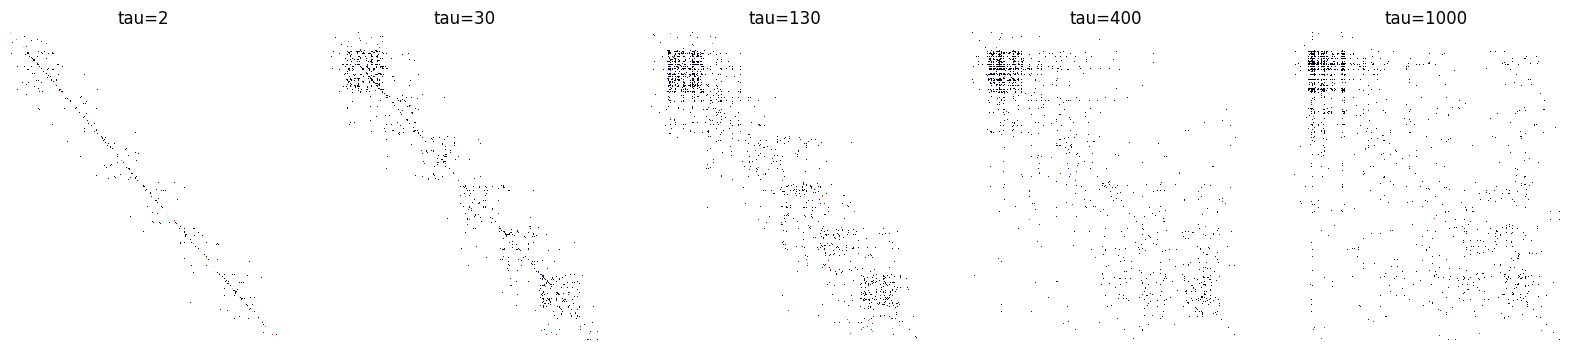

In [6]:
display_taus = [0, 6, 14, 22, len(taus)-1]
fig, ax = plt.subplots(1, len(display_taus),figsize=(20, 20/len(display_taus)))
for i, dt in enumerate(display_taus):
    tm = msms[dt].transition_matrix.toarray()
    sns.heatmap(tm, mask=tm==0, ax=ax[i], cbar=False, xticklabels=[], yticklabels=[])
    ax[i].set_title(f"tau={taus[dt]}")
plt.show()

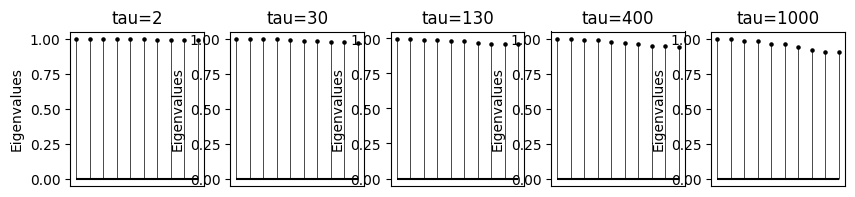

In [8]:
display_taus = [0, 6, 14, 22, 26]
def plot_eigenvalues(eigenvals, ax):
    xs = np.linspace(0, 1, num=len(eigenvals))
    ax.scatter(xs, eigenvals, s=5, c="black")
    for i, eigenw in enumerate(eigenvals):
        ax.vlines(xs[i], eigenw, 0, linewidth=0.5, color="black")
    ax.hlines(0, 0, 1, color="black")
    ax.set_ylabel(f"Eigenvalues")
    ax.axes.get_xaxis().set_visible(False)

fig, ax = plt.subplots(1, len(display_taus),figsize=(10, 10/len(display_taus)))
for i, dt in enumerate(display_taus):
    plot_eigenvalues(msms[i].eigenvalues(), ax[i])
    ax[i].set_title(f"tau={taus[dt]}")
plt.show()

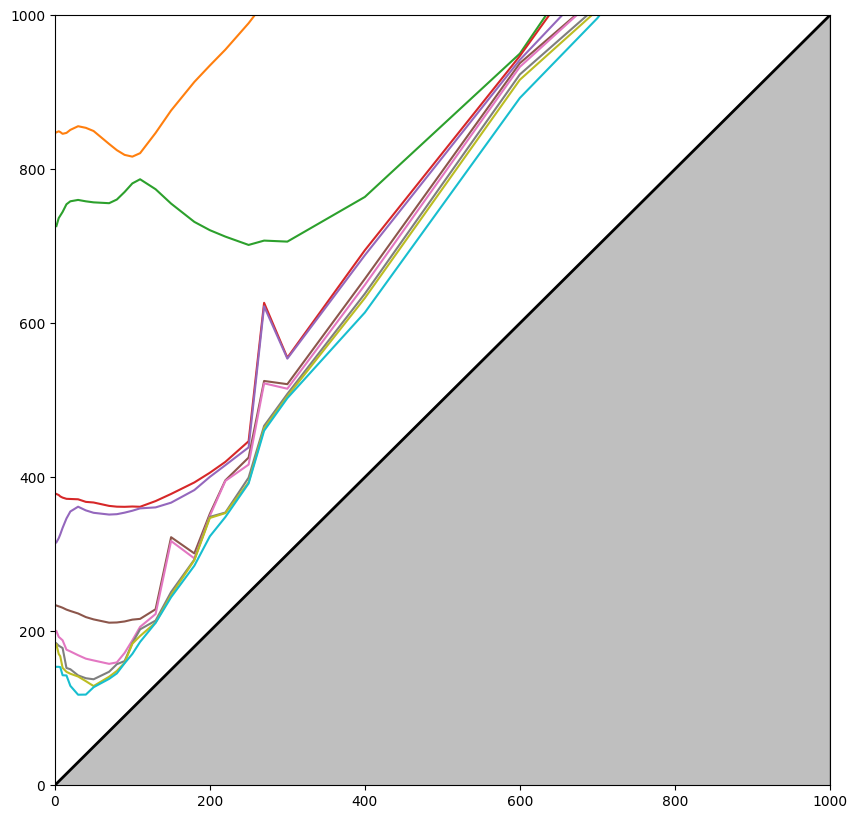

In [16]:
from deeptime.plots import plot_implied_timescales
from deeptime.util.validation import ImpliedTimescales



fig, ax = plt.subplots(1, 1, figsize=(10, 10))

its = ImpliedTimescales(lagtimes=taus, its=[msm.timescales(k=10) for msm in msms])
plot_implied_timescales(data=its, ax=ax)
ax.set_ylim(0, 1000)
ax.set_xlim(0, 1000)
plt.show()



In [ ]:
num_eigenv = 4
fig, ax = plt.subplots(num_eigenv, len(display_taus),figsize=(10*num_eigenv, 30/len(display_taus)))

for i, dt in enumerate(display_taus):
    all_left = msms[i].eigenvectors_left(num_eigenv)
    for j in range(num_eigenv):
        sns.lineplot(all_left[j], ax=ax[j][i], color="black")
plt.show()

For comparison: use same data but a more usual assignment process

In [ ]:
from deeptime.decomposition import TICA

water_sh = SimulationHistogram("H2O_H2O_0095_800008", "H2O", is_pt=False,
                                   full_grid=FullGrid(b_grid_name="12", o_grid_name="10",
                                                      t_grid_name="linspace(0.2, 1.2, 10)"),
                                   second_molecule_selection="bynum 4:6", use_saved=False)


all_models = []
for my_tau in taus:
    tica = TICA(lagtime=my_tau)
    data = []
    
    for ts in water_sh.trajectory_universe.trajectory:
        data.append(ts.positions[3:].reshape((-1, )).copy())
    data = np.array(data)
    tica.fit(data)
    model = tica.fetch_model()
    all_models.append(model)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

its = ImpliedTimescales(lagtimes=taus, its=[model.timescales(k=10) for model in all_models])
plot_implied_timescales(data=its, ax=ax)
#ax.set_ylim(0, 500)
#ax.set_xlim(0, 500)
plt.show()

In [ ]:
print(model.singular_vectors_left[:, 1])

In [19]:
water_sh = SimulationHistogram("H2O_H2O_0095_50000000", "H2O", is_pt=False,
                               full_grid=FullGrid(b_grid_name="42", o_grid_name="40",
                                                  t_grid_name="linspace(0.2, 1.2, 20)"),
                               second_molecule_selection="bynum 4:6", use_saved=True)

taus = np.array([1, 2, 3, 5, 7, 10, 15, 20, 30, 40, 50, 70, 80, 90, 100, 110, 130, 150, 180, 200, 220,
                 250, 270, 300, 400, 600, 700, 850, 1000])

msm = MSM(water_sh, tau_array=taus, use_saved=True)

In [39]:
# get cells most populated in 0th eigenvector
from molgri.space.utils import k_argmax_in_array


vm = ViewManager(water_sh.trajectory_universe)
vm.fresh_view()
water_sh.use_saved = True

evalu, evec = water_sh.get_transition_model().get_eigenval_eigenvec()
magnitudes = evec[8].T[0]

num_extremes = 10
most_positive = k_argmax_in_array(magnitudes, num_extremes)

print(f"In 0th eigenvector {num_extremes} most positive cells are {list(most_positive)}.")
# now assign these to trajectory frames
assigned_frames = []
for one_argmax in most_positive:
    all_assigned = water_sh.get_indices_same_cell(one_argmax)
    assigned_frames.extend(all_assigned)
    
# for gromacs
print(list(np.random.choice(assigned_frames, 300)))
vm.plot_frames_overlapping(np.random.choice(assigned_frames, 50))
vm.view

In 0th eigenvector 10 most positive cells are [3225, 4951, 4950, 4928, 4927, 4905, 4902, 4894, 4880, 4899].
[1658061, 1574127, 462199, 1970837, 795900, 1762226, 276272, 359173, 2328190, 1511371, 1220830, 162349, 2157011, 433296, 1668067, 1220283, 411897, 2215424, 1672371, 2037680, 1931841, 1089327, 1265036, 217139, 378107, 83658, 1038717, 546520, 1274641, 644190, 2198089, 2115335, 2228467, 2475777, 167153, 944701, 1895352, 2019287, 103771, 2183924, 393599, 658592, 2126868, 221507, 761205, 930988, 650188, 1855476, 422020, 82020, 467750, 960588, 2000779, 2280739, 654202, 1581563, 917444, 565074, 348642, 1191034, 649886, 2422502, 1981122, 56917, 1475652, 1174022, 395846, 1890546, 2265604, 481933, 896336, 2344779, 455730, 1724025, 1682468, 1274568, 985845, 2099212, 1713173, 1613891, 1734720, 1352502, 352984, 370791, 924317, 1461231, 804534, 2238616, 345840, 394788, 1530361, 1568126, 2452892, 1896659, 1175098, 1207669, 2123963, 815477, 362728, 1382429, 1633828, 530711, 790535, 642542, 13686

NGLWidget()

In [51]:
# get cells most and least populated in 1st eigenvector

from molgri.space.utils import k_argmin_in_array


vm = ViewManager(water_sh.trajectory_universe)
vm.fresh_view()
water_sh.use_saved = True

evalu, evec = water_sh.get_transition_model().get_eigenval_eigenvec()
magnitudes = evec[8].T[1]

num_extremes = 10
most_positive = k_argmax_in_array(magnitudes, num_extremes)
most_negative = k_argmax_in_array(-magnitudes, num_extremes)


print(f"In 1st eigenvector {num_extremes} most positive cells are {list(most_positive)} and most negative {list(most_negative)}.")
# now assign these to trajectory frames

assigned_frames_p = []
for one_argmax in most_positive:
    all_assigned = water_sh.get_indices_same_cell(one_argmax)
    assigned_frames_p.extend(all_assigned)
assigned_frames_n = []
for one_argmax in most_negative:
    all_assigned = water_sh.get_indices_same_cell(one_argmax)
    assigned_frames_n.extend(all_assigned)

colors = ["blue",]*25
colors.extend(["red",]*25)

assigned_frames = list(np.random.choice(assigned_frames_p, 25))
assigned_frames.extend(list(np.random.choice(assigned_frames_n, 25)))
# for gromacs
print(list(assigned_frames))
vm.plot_frames_overlapping(assigned_frames, colors=colors)
vm.view

In 1st eigenvector 10 most positive cells are [3225, 4899, 4902, 4880, 4894, 4950, 4927, 4905, 4928, 4951] and most negative [17955, 17073, 18260, 16749, 15939, 18345, 18429, 17000, 17005, 17252].
[1416878, 2279391, 1472116, 653722, 1536115, 1711134, 578827, 2280703, 1833533, 1594231, 1162679, 1862752, 1959829, 39317, 1278494, 1268704, 1368140, 2421417, 642095, 498745, 1073056, 1797935, 2293599, 2078428, 662873, 260521, 45328, 1378429, 1754069, 1608959, 260294, 2427236, 647170, 2385927, 1669488, 1881020, 248278, 2185317, 603681, 2380801, 1756396, 1691075, 840349, 2224305, 316458, 1942413, 2252738, 332482, 1016878, 1858060]


NGLWidget()

In [53]:
# get cells most and least populated in 2nd eigenvector
from molgri.space.utils import k_argmin_in_array


vm = ViewManager(water_sh.trajectory_universe)
vm.fresh_view()
water_sh.use_saved = True

evalu, evec = water_sh.get_transition_model().get_eigenval_eigenvec()
magnitudes = evec[8].T[2]

num_extremes = 10
most_positive = k_argmax_in_array(magnitudes, num_extremes)
most_negative = k_argmax_in_array(-magnitudes, num_extremes)


print(f"In 2nd eigenvector {num_extremes} most positive cells are {list(most_positive)} and most negative {list(most_negative)}.")
# now assign these to trajectory frames

assigned_frames_p = []
for one_argmax in most_positive:
    all_assigned = water_sh.get_indices_same_cell(one_argmax)
    assigned_frames_p.extend(all_assigned)
assigned_frames_n = []
for one_argmax in most_negative:
    all_assigned = water_sh.get_indices_same_cell(one_argmax)
    assigned_frames_n.extend(all_assigned)
    
num_random = 25

colors = ["blue",]*num_random
colors.extend(["red",]*num_random)

assigned_frames = list(np.random.choice(assigned_frames_p, num_random))
assigned_frames.extend(list(np.random.choice(assigned_frames_n, num_random)))
# for gromacs
print(list(assigned_frames))
vm.plot_frames_overlapping(assigned_frames, colors=colors)
vm.view

In 2nd eigenvector 10 most positive cells are [3225, 4899, 4894, 4902, 4905, 4880, 4951, 4928, 4950, 4927] and most negative [3928, 4443, 3649, 4557, 3927, 3939, 4551, 4569, 3934, 3625].
[1670652, 1764455, 1233097, 210707, 2093673, 1248504, 1415872, 1335374, 1610224, 1776005, 2119775, 2120219, 546792, 1440607, 247354, 182982, 1681355, 783312, 1168003, 193849, 1399092, 2003757, 348324, 327852, 504470, 184771, 1733455, 477831, 1050507, 572527, 2097927, 2005073, 1927328, 1214868, 1753666, 1708070, 109547, 875547, 2292540, 1394548, 2163151, 1954812, 709593, 11816, 1240372, 1310731, 2449442, 293486, 2488779, 583516]


NGLWidget()

In [ ]:
# get cells most and least populated in 3rd eigenvector